# Replicate

>[Replicate](https://replicate.com/blog/machine-learning-needs-better-tools) runs machine learning models in the cloud. We have a library of open-source models that you can run with a few lines of code. If you're building your own machine learning models, Replicate makes it easy to deploy them at scale.

This example goes over how to use LangChain to interact with `Replicate` [models](https://replicate.com/explore)

## Setup

In [3]:
# magics to auto-reload external modules in case you are making changes to langchain while working on this notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To run this notebook, you'll need to create a [replicate](https://replicate.com) account and install the [replicate python client](https://github.com/replicate/replicate-python).

In [4]:
!poetry run pip install replicate

/bin/bash: line 1: poetry: command not found


In [5]:
# get a token: https://replicate.com/account

from getpass import getpass

REPLICATE_API_TOKEN = getpass()

··········


In [8]:
%pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [12]:
%pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.7 MB/s eta 0:00:00


In [9]:
import os

os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

In [10]:
from langchain.chains import LLMChain
from langchain_community.llms import Replicate
from langchain_core.prompts import PromptTemplate

## Calling a model

Find a model on the [replicate explore page](https://replicate.com/explore), and then paste in the model name and version in this format: model_name/version.

For example, here is [`Meta Llama 3`](https://replicate.com/meta/meta-llama-3-8b-instruct).

In [13]:
llm = Replicate(
    model="meta/meta-llama-3-8b-instruct",
    model_kwargs={"temperature": 0.75, "max_length": 500, "top_p": 1},
)
prompt = """
User: Answer the following yes/no question by reasoning step by step. Can a dog drive a car?
Assistant:
"""
llm(prompt)

'\n\nTo answer this question, let\'s break it down step by step.\n\n1. Dogs are living creatures that belong to the species Canis lupus familiaris.\n2. Dogs do not possess the cognitive abilities or physical attributes necessary to operate a vehicle.\n3. Driving a car requires a human-like level of intelligence, including the ability to understand complex instructions, make decisions, and manipulate the vehicle\'s controls.\n4. Dogs do not possess hands or fingers to operate the steering wheel, pedals, or other controls.\n5. Even if a dog were able to somehow magically manipulate the controls, they would not have the physical strength or coordination to operate the vehicle safely.\n6. Additionally, dogs would not be able to read road signs, understand traffic laws, or make rational decisions about speed and direction.\n\nGiven these logical steps, the answer to the question "Can a dog drive a car?" is:\n\n**NO**'

As another example, for this [dolly model](https://replicate.com/replicate/dolly-v2-12b), click on the API tab. The model name/version would be: `replicate/dolly-v2-12b:ef0e1aefc61f8e096ebe4db6b2bacc297daf2ef6899f0f7e001ec445893500e5`

Only the `model` param is required, but we can add other model params when initializing.

For example, if we were running stable diffusion and wanted to change the image dimensions:

```
Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf", input={'image_dimensions': '512x512'})
```
                       
*Note that only the first output of a model will be returned.*

In [14]:
llm = Replicate(
    model="replicate/dolly-v2-12b:ef0e1aefc61f8e096ebe4db6b2bacc297daf2ef6899f0f7e001ec445893500e5"
)

In [15]:
prompt = """
Answer the following yes/no question by reasoning step by step.
Can a dog drive a car?
"""
llm(prompt)

ReplicateError: ReplicateError Details:
title: Billing required
status: 402
detail: You need to set up billing to run this model. Go to https://replicate.com/account/billing#billing to set it up.

We can call any replicate model using this syntax. For example, we can call stable diffusion.

In [20]:
text2image = Replicate(
    model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf",
    model_kwargs={"image_dimensions": "512x512"},
)

In [21]:
image_output = text2image("A cat riding a motorcycle by Picasso")
image_output

'https://replicate.delivery/yhqm/ZJvWkYlZHga7J9rizbu8jLuaLVI9MSIMgOQWvgnTQe8jx0AKA/out-0.png'

The model spits out a URL. Let's render it.

In [ ]:
!poetry run pip install Pillow

In [22]:
%pip install Pillow

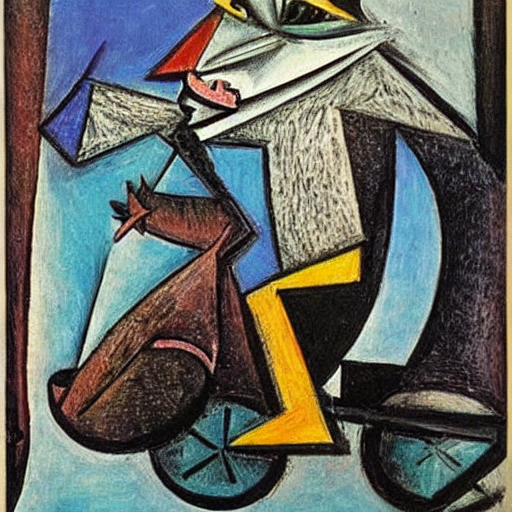

In [23]:
from io import BytesIO

import requests
from PIL import Image

response = requests.get(image_output)
img = Image.open(BytesIO(response.content))

img

## Streaming Response
You can optionally stream the response as it is produced, which is helpful to show interactivity to users for time-consuming generations. See detailed docs on [Streaming](/docs/how_to/streaming_llm) for more information.

In [ ]:
from langchain_core.callbacks import StreamingStdOutCallbackHandler

llm = Replicate(
    streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()],
    model="a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5",
    model_kwargs={"temperature": 0.75, "max_length": 500, "top_p": 1},
)
prompt = """
User: Answer the following yes/no question by reasoning step by step. Can a dog drive a car?
Assistant:
"""
_ = llm.invoke(prompt)

# Stop Sequences
You can also specify stop sequences. If you have a definite stop sequence for the generation that you are going to parse with anyway, it is better (cheaper and faster!) to just cancel the generation once one or more stop sequences are reached, rather than letting the model ramble on till the specified `max_length`. Stop sequences work regardless of whether you are in streaming mode or not, and Replicate only charges you for the generation up until the stop sequence.

In [ ]:
import time

llm = Replicate(
    model="a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5",
    model_kwargs={"temperature": 0.01, "max_length": 500, "top_p": 1},
)

prompt = """
User: What is the best way to learn python?
Assistant:
"""
start_time = time.perf_counter()
raw_output = llm.invoke(prompt)  # raw output, no stop
end_time = time.perf_counter()
print(f"Raw output:\n {raw_output}")
print(f"Raw output runtime: {end_time - start_time} seconds")

start_time = time.perf_counter()
stopped_output = llm.invoke(prompt, stop=["\n\n"])  # stop on double newlines
end_time = time.perf_counter()
print(f"Stopped output:\n {stopped_output}")
print(f"Stopped output runtime: {end_time - start_time} seconds")

## Chaining Calls
The whole point of langchain is to... chain! Here's an example of how do that.

In [24]:
from langchain.chains import SimpleSequentialChain

First, let's define the LLM for this model as a flan-5, and text2image as a stable diffusion model.

In [25]:
dolly_llm = Replicate(
    model="replicate/dolly-v2-12b"
)
text2image = Replicate(
    model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf"
)

First prompt in the chain

In [26]:
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

chain = LLMChain(llm=dolly_llm, prompt=prompt)

<ipython-input-26-a8df737415ee>:6: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=dolly_llm, prompt=prompt)


Second prompt to get the logo for company description

In [27]:
second_prompt = PromptTemplate(
    input_variables=["company_name"],
    template="Write a description of a logo for this company: {company_name}",
)
chain_two = LLMChain(llm=dolly_llm, prompt=second_prompt)

Third prompt, let's create the image based on the description output from prompt 2

In [28]:
third_prompt = PromptTemplate(
    input_variables=["company_logo_description"],
    template="{company_logo_description}",
)
chain_three = LLMChain(llm=text2image, prompt=third_prompt)

Now let's run it!

In [29]:
# Run the chain specifying only the input variable for the first chain.
overall_chain = SimpleSequentialChain(
    chains=[chain, chain_two, chain_three], verbose=True
)
catchphrase = overall_chain.run("colorful socks")
print(catchphrase)

<ipython-input-29-9a32ef51ba5c>:5: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  catchphrase = overall_chain.run("colorful socks")




> Entering new SimpleSequentialChain chain...


ReplicateError: ReplicateError Details:
title: Version disabled
status: 422
detail: This version has been disabled because it consistently fails to complete setup.

In [ ]:
response = requests.get(
    "https://replicate.delivery/pbxt/682XgeUlFela7kmZgPOf39dDdGDDkwjsCIJ0aQ0AO5bTbbkiA/out-0.png"
)
img = Image.open(BytesIO(response.content))
img